In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Load necessary datasets

In [2]:
#load mutations table for RNAP
mutations = pd.read_csv('data/RNAP_MUTATIONS.csv')
mutations

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,NaN,1075.0,A,1.0,False,NaN,NaN
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,NaN,561.0,E,1.0,False,NaN,NaN
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176550,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoB,1326_del_gttgaccca,NaN,NaN,1326.0,761132.0,1326.0,True,-9.0,gttgaccca,NaN,NaN,NaN,False,NaN,NaN
176551,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,A172V,gcc,gtc,NaN,NaN,172.0,True,NaN,NaN,172.0,V,1.0,False,NaN,NaN
176552,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,R173R,cgg,agg,NaN,NaN,173.0,True,NaN,NaN,173.0,R,1.0,False,NaN,NaN
176553,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,P601L,ccg,ctg,NaN,NaN,601.0,True,NaN,NaN,601.0,L,1.0,False,NaN,NaN


In [3]:
#load known resistance mutations from EFFECTS table
effects = pd.read_pickle('data/EFFECTS.pkl.gz')
effects.reset_index(inplace = True)
effects['GENE_MUTATION'] = effects['GENE'].astype(str) + '_' + effects['MUTATION']
effects = effects[(effects.DRUG=='RIF') & (effects.PREDICTION=='R') 
                  & (~effects.MUTATION.str[-1].isin(['O','X']))]

resistance_mutations = effects.GENE_MUTATION.unique()
len(resistance_mutations)

128

In [4]:
#load conservative list of CMs from previous paper
CMs = pd.read_csv('data/final_CM_hit_list.csv')
CMs = CMs[CMs.homoplasy == True]
CMs

compensatory_mutations = CMs['putative CM'].unique()
len(compensatory_mutations)

51

In [5]:
#add resistance and compensatory mutation flags to mutations table: need to check for minor allele before concatenating GENE_MUTATION 
# use resistance catalogue of WHO instead?
mutations['GENE_MUTATION'] = np.where(
    mutations['IS_MINOR_ALLELE'],  # Condition: if IS_MINOR_ALLELE is True
    mutations['GENE'].astype(str) + '_' + mutations['MINOR_MUTATION'].astype(str),  # Then: use GENE + MINOR_MUTATION
    mutations['GENE'].astype(str) + '_' + mutations['MUTATION'].astype(str)  # Else: use GENE + MUTATION
)
    
mutations['RESISTANT_MUTATION'] = mutations['GENE_MUTATION'].isin(resistance_mutations)
mutations['COMPENSATORY_MUTATION'] = mutations['GENE_MUTATION'].isin(compensatory_mutations)

mutations

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS,GENE_MUTATION,RESISTANT_MUTATION,COMPENSATORY_MUTATION
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,NaN,1075.0,A,1.0,False,NaN,NaN,rpoB_A1075A,False,False
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,NaN,561.0,E,1.0,False,NaN,NaN,rpoB_E561E,False,False
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN,rpoB_S450L,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176550,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoB,1326_del_gttgaccca,NaN,NaN,1326.0,761132.0,1326.0,True,-9.0,gttgaccca,NaN,NaN,NaN,False,NaN,NaN,rpoB_1326_del_gttgaccca,True,False
176551,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,A172V,gcc,gtc,NaN,NaN,172.0,True,NaN,NaN,172.0,V,1.0,False,NaN,NaN,rpoC_A172V,False,False
176552,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,R173R,cgg,agg,NaN,NaN,173.0,True,NaN,NaN,173.0,R,1.0,False,NaN,NaN,rpoC_R173R,False,False
176553,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,P601L,ccg,ctg,NaN,NaN,601.0,True,NaN,NaN,601.0,L,1.0,False,NaN,NaN,rpoC_P601L,False,False


In [6]:
#add phenotypes flag to mutations table (filter out low quality phenotypes)
phenotypes = pd.read_pickle('data/DST_MEASUREMENTS.pkl.gz')
phenotypes.reset_index(inplace = True)
phenotypes = phenotypes[(phenotypes.DRUG == 'RIF')] #  & (phenotypes.QUALITY != 'LOW')
phenotypes

#merge mutations and phenotypes tables, can also do a left join to keep samples without phenotypes (might be useful for CM statistics)
mutations_phenotypes = pd.merge(mutations, phenotypes[['UNIQUEID','PHENOTYPE','QUALITY']], on = 'UNIQUEID', how = 'inner')
mutations_phenotypes['PHENOTYPE'] = mutations_phenotypes['PHENOTYPE'] == 'R'

#drop UNIQUEIDs with phenotypes of low quality
low_quality_ids = mutations_phenotypes[mutations_phenotypes['QUALITY'] == 'LOW']['UNIQUEID'].unique()
mutations_phenotypes = mutations_phenotypes[~mutations_phenotypes['UNIQUEID'].isin(low_quality_ids)]

mutations_phenotypes = mutations_phenotypes.drop(columns = ['QUALITY'])
print(len(mutations_phenotypes.UNIQUEID.unique()))

28052


Calculate sensitivity and specificity of RIF resistance in all samples using different FRS scores

In [7]:
# aggregate mutations_phenotype by UNIQUEID and keep columns of interest: included new definition of FRS
def aggregate_minor_major_allele(group):
    # Check if any row has both IS_MINOR_ALLELE == True and RESISTANT_MUTATION == True
    minor_allele_flag = any((group['IS_MINOR_ALLELE'] == True) & (group['RESISTANT_MUTATION'] == True))
    major_allele_flag = any((group['IS_MINOR_ALLELE'] == False) & (group['RESISTANT_MUTATION'] == True))

    # Get the rows where there is a resistant minor allele
    resistant_minor_allele_rows = group[(group['IS_MINOR_ALLELE'] == True) & (group['RESISTANT_MUTATION'] == True)]
    
    if not resistant_minor_allele_rows.empty:
        # If there are resistant minor alleles, get the maximum FRS value for those rows
        frs_value = resistant_minor_allele_rows['FRS'].max()
    else:
        # Otherwise, use the maximum FRS value from the entire group
        frs_value = group['FRS'].max()
    
    return pd.Series({
        'RESISTANT_MUTATION': group['RESISTANT_MUTATION'].max(),
        'COMPENSATORY_MUTATION': group['COMPENSATORY_MUTATION'].max(),
        'PHENOTYPE': group['PHENOTYPE'].max(),
        'R_MINOR_ALLELE': minor_allele_flag,
        'R_MAJOR_ALLELE': major_allele_flag,
        'FRS': frs_value,  # Use the maximum FRS for resistant minor alleles, if present
    })

# Apply the custom aggregation function
mutations_agg = mutations_phenotypes.groupby('UNIQUEID').apply(aggregate_minor_major_allele).reset_index()

/var/folders/_3/8y_dwngx2614_y_52fzh1c4w0000gn/T/ipykernel_22353/2414199851.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mutations_agg = mutations_phenotypes.groupby('UNIQUEID').apply(aggregate_minor_major_allele).reset_index()


In [8]:
mutations_agg

,UNIQUEID,RESISTANT_MUTATION,COMPENSATORY_MUTATION,PHENOTYPE,R_MINOR_ALLELE,R_MAJOR_ALLELE,FRS
0,site.00.subj.1000347.lab.H111540004.iso.1,True,False,True,False,True,NaN
1,site.00.subj.1000595.lab.H123460044.iso.1,True,True,True,False,True,NaN
2,site.00.subj.1004213.lab.H111060034.iso.1,True,True,True,False,True,NaN
3,site.00.subj.1004213.lab.H112000008.iso.1,True,True,True,False,True,NaN
4,site.00.subj.1004213.lab.H113100007.iso.1,True,True,True,False,True,NaN
...,...,...,...,...,...,...,...
28047,site.35.subj.95.lab.IE19.iso.1,True,True,True,False,True,NaN
28048,site.35.subj.96.lab.IE20.iso.1,True,False,True,False,True,NaN
28049,site.35.subj.97.lab.IE21.iso.1,True,False,True,False,True,NaN
28050,site.35.subj.98.lab.IE22.iso.1,True,False,True,False,True,NaN


In [9]:
# define function for calculating sensitivity, specificity, PPV and NPV
#calculate sensitivity: number of phenotypically resistant samples that are found to have a resistant mutation / total number of phenotypically resistant samples
#calculate specificity: number of phenotypically sensitive samples that do not have a resistance mutation / total number of phenotypically sensitive samples
#calculate PPV: number of samples with a resistance mutation that are phenotypically resistant / total number of samples with a resistance mutation
#calculate NPV: number of samples without a resistance mutation that are phenotypically sensitive / total number of samples without a resistance mutation

def calculate_statistics(df):
    sensitivity = df[(df['PHENOTYPE'] == True) & (df['RESISTANT_MUTATION'] == True)].shape[0] / df[df['PHENOTYPE'] == True].shape[0]
    specificity = df[(df['PHENOTYPE'] == False) & (df['RESISTANT_MUTATION'] == False)].shape[0] / df[df['PHENOTYPE'] == False].shape[0]
    PPV = df[(df['RESISTANT_MUTATION'] == True) & (df['PHENOTYPE'] == True)].shape[0] / df[df['RESISTANT_MUTATION'] == True].shape[0]
    NPV = df[(df['RESISTANT_MUTATION'] == False) & (df['PHENOTYPE'] == False)].shape[0] / df[df['RESISTANT_MUTATION'] == False].shape[0]
    return sensitivity, specificity, PPV, NPV

In [10]:
#calculate statistics for no FRS cutoff
print(mutations_agg.RESISTANT_MUTATION.value_counts())
sen_all, spe_all, ppv_all, npv_all = calculate_statistics(mutations_agg)
sen_all, spe_all, ppv_all, npv_all

RESISTANT_MUTATION
False    17302
True     10750
Name: count, dtype: int64


(0.971577223239233, 0.96231539636734, 0.938046511627907, 0.9829499479828921)

In [11]:
#calculate statistics for FRS cutoff >=0.9 (major allele definition)
major_mutations = mutations_agg.copy()
major_mutations['RESISTANT_MUTATION'] = major_mutations['R_MAJOR_ALLELE']
print(major_mutations.RESISTANT_MUTATION.value_counts())
sen_maj, spe_maj, ppv_maj, npv_maj = calculate_statistics(major_mutations)
sen_maj, spe_maj, ppv_maj, npv_maj

RESISTANT_MUTATION
False    17566
True     10486
Name: count, dtype: int64


(0.9501878793718085, 0.964691902902733, 0.940492084684341, 0.9705681430035296)

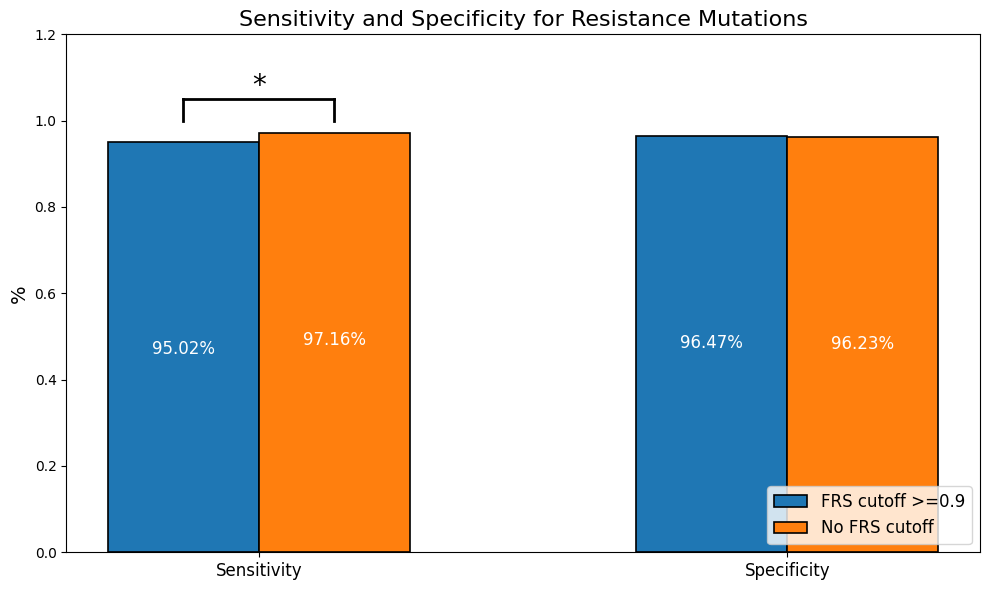

In [12]:
# plot sensitivity and specificity for no FRS cutoff and for FRS cutoff >=0.9 (major allele definition) as a histogram
def create_stats_df(sen_1, sen_2, spe_1, spe_2):
    stats = pd.DataFrame({
        'Metric': ['Sensitivity', 'Specificity'],
        'FRS cutoff >=0.9 (major allele definition)': [sen_1, spe_1],
        'No FRS cutoff': [sen_2, spe_2]
    })
    return stats


def plot_stats_histogram(stats, significant = True, save_figure=False, save_name='sensitivity_specificity_histogram'):
    # Adjusting the plot to group bars by criteria and display percentage inside the bar
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting bars next to each other
    x = [0, 0.7]  # positions for FRS cutoff >=0.9 (major allele definition)
    bar_width = 0.2

    bars1 = ax.bar(x, stats['FRS cutoff >=0.9 (major allele definition)'], 
                width=bar_width, color='#1f77b4', edgecolor='black', linewidth=1.2, label='FRS cutoff >=0.9')
    bars2 = ax.bar([p + bar_width for p in x], stats['No FRS cutoff'], 
                width=bar_width, color='#ff7f0e', edgecolor='black', linewidth=1.2, label='No FRS cutoff')

    # Adding percentage values inside the bars
    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval - 0.5, f'{yval:.2%}', 
                    ha='center', va='bottom', fontsize=12, color='white')

    # Customize the plot
    ax.set_title('Sensitivity and Specificity for Resistance Mutations', fontsize=16)
    ax.set_ylabel('%', fontsize=14)
    ax.set_ylim(0, 1.2)

    # Setting custom x-axis labels
    ax.set_xticks([r + bar_width/2 for r in x])
    ax.set_xticklabels(['Sensitivity', 'Specificity'], fontsize=12)

    # Adding the legend
    ax.legend(loc='lower right', fontsize=12)

    #add significance indicator with horizontal bar between bars of sensitivity
    if significant:
        ax.plot([0, 0], [1, 1.05], color='black', lw=2)
        ax.plot([0.2, 0.2], [1, 1.05], color='black', lw=2)
        ax.plot([0, 0.2], [1.05, 1.05], color='black', lw=2)
        ax.text(0.1, 1.08, '*', fontsize=20, color='black', ha='center', va='center')

    plt.tight_layout()
    plt.show()

    #save figure if print_stats is True
    if save_figure:
        fig.savefig(f'figures/{save_name}.png', dpi=300)

        # fig.savefig(f'figures/' + save_name, dpi=300)
        

stats = create_stats_df(sen_maj, sen_all, spe_maj, spe_all)
plot_stats_histogram(stats, significant = True, save_figure=True, save_name = 'sensitivity_specificity_histogram')

In [13]:
#perform a z test to test for significant difference between the sensitivities and specificities
from statsmodels.stats.proportion import proportions_ztest

# Sensitivity
count = np.array([mutations_agg[(mutations_agg['PHENOTYPE'] == True) & (mutations_agg['RESISTANT_MUTATION'] == True)].shape[0], major_mutations[(major_mutations['PHENOTYPE'] == True) & (major_mutations['RESISTANT_MUTATION'] == True)].shape[0]])
nobs = np.array([mutations_agg[mutations_agg['PHENOTYPE'] == True].shape[0], major_mutations[major_mutations['PHENOTYPE'] == True].shape[0]])
z, p = proportions_ztest(count, nobs)
print(count, nobs, z, p)

# Specificity
count = np.array([mutations_agg[(mutations_agg['PHENOTYPE'] == False) & (mutations_agg['RESISTANT_MUTATION'] == False)].shape[0], major_mutations[(major_mutations['PHENOTYPE'] == False) & (major_mutations['RESISTANT_MUTATION'] == False)].shape[0]])
nobs = np.array([mutations_agg[mutations_agg['PHENOTYPE'] == False].shape[0], major_mutations[major_mutations['PHENOTYPE'] == False].shape[0]])
z, p = proportions_ztest(count, nobs)
print(count, nobs, z, p)


[10084  9862] [10379 10379] 7.947669635398789 1.9005266452625613e-15
[17007 17049] [17673 17673] -1.1913181357783043 0.23352871690872834


In [15]:
#calculate statistics for FRS cutoff >=0.5 
minor_cutoff = mutations_agg.copy()
minor_cutoff['RESISTANT_MUTATION'] = ((minor_cutoff['FRS'] >= 0.0) & (minor_cutoff['R_MINOR_ALLELE'] == True)) | (minor_cutoff['R_MAJOR_ALLELE'] == True)
print(minor_cutoff.RESISTANT_MUTATION.value_counts())
calculate_statistics(minor_cutoff)

RESISTANT_MUTATION
False    17302
True     10750
Name: count, dtype: int64


(0.971577223239233, 0.96231539636734, 0.938046511627907, 0.9829499479828921)

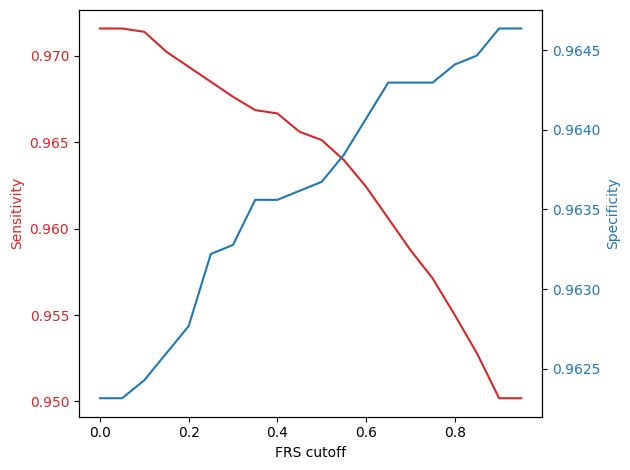

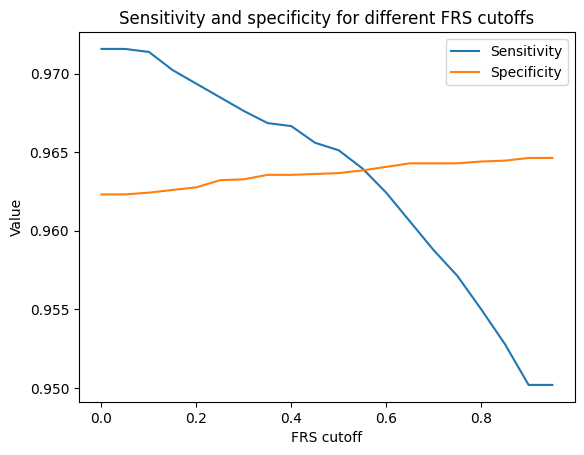

In [21]:
#plot the sensitivity for different FRS cutoffs
sensitivity = []
specificity = []
PPV = []
NPV = []
FRS = []

for i in range(0, 100, 5):
    cutoff = i/100
    df = mutations_agg.copy()

    # assign RESISTANT_MUTATION column to True if FRS is >= cutoff while R_MINOR_ALLELE is True or if R_MAJOR_ALLELE is True
    df['RESISTANT_MUTATION'] = ((df['FRS'] >= cutoff) & (df['R_MINOR_ALLELE'] == True)) | (df['R_MAJOR_ALLELE'] == True)

    # df = df[(df.FRS.isna())|(df.FRS>=cutoff)]

    # calculate_statistics(df)
    sensitivity.append(df[(df['PHENOTYPE'] == True) & (df['RESISTANT_MUTATION'] == True)].shape[0] / df[df['PHENOTYPE'] == True].shape[0])
    specificity.append(df[(df['PHENOTYPE'] == False) & (df['RESISTANT_MUTATION'] == False)].shape[0] / df[df['PHENOTYPE'] == False].shape[0])
    # PPV.append(df[(df['RESISTANT_MUTATION'] == True) & (df['PHENOTYPE'] == True)].shape[0] / df[df['RESISTANT_MUTATION'] == True].shape[0])
    # NPV.append(df[(df['RESISTANT_MUTATION'] == False) & (df['PHENOTYPE'] == False)].shape[0] / df[df['RESISTANT_MUTATION'] == False].shape[0])
    FRS.append(cutoff)

##plot sensitivity and specificity using two different y axes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('FRS cutoff')
ax1.set_ylabel('Sensitivity', color=color)
ax1.plot(FRS, sensitivity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Specificity', color=color)  # we already handled the x-label with ax1
ax2.plot(FRS, specificity, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

##plot sensitivity and specificity using one y axis
plt.plot(FRS, sensitivity, label = 'Sensitivity')
plt.plot(FRS, specificity, label = 'Specificity')
# plt.plot(FRS, PPV, label = 'PPV')
# plt.plot(FRS, NPV, label = 'NPV')   
plt.legend()
plt.xlabel('FRS cutoff')
plt.ylabel('Value')
plt.title('Sensitivity and specificity for different FRS cutoffs')

# #save figure in high resolution
# plt.savefig('figures/sensitivity_specificity_FRS_cutoff.png', dpi=300)

plt.show()

Check how much presence of CMs can improve predictions (with and without considering minor alleles)

In [19]:
mutations_agg

,UNIQUEID,RESISTANT_MUTATION,COMPENSATORY_MUTATION,PHENOTYPE,R_MINOR_ALLELE,R_MAJOR_ALLELE,FRS
0,site.00.subj.1000347.lab.H111540004.iso.1,True,False,True,False,True,NaN
1,site.00.subj.1000595.lab.H123460044.iso.1,True,True,True,False,True,NaN
2,site.00.subj.1004213.lab.H111060034.iso.1,True,True,True,False,True,NaN
3,site.00.subj.1004213.lab.H112000008.iso.1,True,True,True,False,True,NaN
4,site.00.subj.1004213.lab.H113100007.iso.1,True,True,True,False,True,NaN
...,...,...,...,...,...,...,...
28047,site.35.subj.95.lab.IE19.iso.1,True,True,True,False,True,NaN
28048,site.35.subj.96.lab.IE20.iso.1,True,False,True,False,True,NaN
28049,site.35.subj.97.lab.IE21.iso.1,True,False,True,False,True,NaN
28050,site.35.subj.98.lab.IE22.iso.1,True,False,True,False,True,NaN


In [18]:
#calculate statistics for CMs indicating resistance, excluding minor alleles
CM_mutations = mutations_agg.copy()
CM_mutations['RESISTANT_MUTATION'] = (CM_mutations['COMPENSATORY_MUTATION'] == True) | (CM_mutations['R_MAJOR_ALLELE'] == True)
print(CM_mutations.RESISTANT_MUTATION.value_counts())
sen_CM_maj, spe_CM_maj, ppv_CM_maj, npv_CM_maj = calculate_statistics(CM_mutations)
sen_CM_maj, spe_CM_maj, ppv_CM_maj, npv_CM_maj

RESISTANT_MUTATION
False    17540
True     10512
Name: count, dtype: int64


(0.9523075440793911,
 0.9644655689469813,
 0.9402587519025876,
 0.9717787913340935)

In [19]:
#calculate statistics for FRS cutoff >=0.9 (major allele definition)
major_mutations = mutations_agg.copy()
major_mutations['RESISTANT_MUTATION'] = major_mutations['R_MAJOR_ALLELE']
print(major_mutations.RESISTANT_MUTATION.value_counts())
sen_maj, spe_maj, ppv_maj, npv_maj = calculate_statistics(major_mutations)
sen_maj, spe_maj, ppv_maj, npv_maj

RESISTANT_MUTATION
False    17566
True     10486
Name: count, dtype: int64


(0.9501878793718085, 0.964691902902733, 0.940492084684341, 0.9705681430035296)

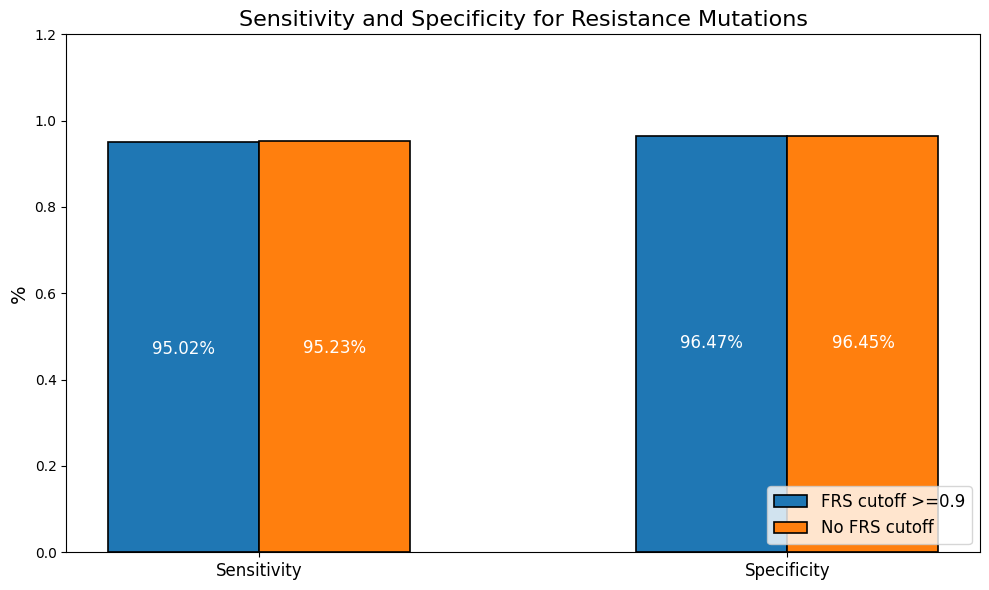

In [20]:
stats = create_stats_df(sen_maj, sen_CM_maj, spe_maj, spe_CM_maj)
plot_stats_histogram(stats, significant = False, save_figure=True, save_name = 'sensitivity_specificity_histogram_CM')

In [21]:
#perform a z test to test for significant difference between the sensitivities and specificities
from statsmodels.stats.proportion import proportions_ztest

# Sensitivity
count = np.array([major_mutations[(major_mutations['PHENOTYPE'] == True) & (major_mutations['RESISTANT_MUTATION'] == True)].shape[0], CM_mutations[(CM_mutations['PHENOTYPE'] == True) & (CM_mutations['RESISTANT_MUTATION'] == True)].shape[0]])
nobs = np.array([major_mutations[major_mutations['PHENOTYPE'] == True].shape[0], CM_mutations[CM_mutations['PHENOTYPE'] == True].shape[0]])
z, p = proportions_ztest(count, nobs)
print(count, nobs, z, p)

# Specificity
count = np.array([major_mutations[(major_mutations['PHENOTYPE'] == False) & (major_mutations['RESISTANT_MUTATION'] == False)].shape[0], CM_mutations[(CM_mutations['PHENOTYPE'] == False) & (CM_mutations['RESISTANT_MUTATION'] == False)].shape[0]])
nobs = np.array([major_mutations[major_mutations['PHENOTYPE'] == False].shape[0], CM_mutations[CM_mutations['PHENOTYPE'] == False].shape[0]])
z, p = proportions_ztest(count, nobs)
print(count, nobs, z, p)


[9862 9884] [10379 10379] -0.709064286924491 0.4782845838113805
[17049 17045] [17673 17673] 0.1151036207073956 0.9083629900717725


In [22]:
#calculate statistics for CMs indicating resistance, and including minor alleles
CM_mutations_minor = mutations_agg.copy()
CM_mutations_minor['RESISTANT_MUTATION'] = (CM_mutations_minor['COMPENSATORY_MUTATION'] == True) | (CM_mutations_minor['RESISTANT_MUTATION'] == True)
print(CM_mutations_minor.RESISTANT_MUTATION.value_counts())
sen_CM_all, spe_CM_all, ppv_CM_all, npv_CM_all = calculate_statistics(CM_mutations_minor)
sen_CM_all, spe_CM_all, ppv_CM_all, npv_CM_all

RESISTANT_MUTATION
False    17288
True     10764
Name: count, dtype: int64


(0.9728297523846228, 0.9622588128784021, 0.938034188034188, 0.9836881073577047)

In [23]:
#calculate statistics for no FRS cutoff
print(mutations_agg.RESISTANT_MUTATION.value_counts())
sen_all, spe_all, ppv_all, npv_all = calculate_statistics(mutations_agg)
sen_all, spe_all, ppv_all, npv_all

RESISTANT_MUTATION
False    17302
True     10750
Name: count, dtype: int64


(0.971577223239233, 0.96231539636734, 0.938046511627907, 0.9829499479828921)

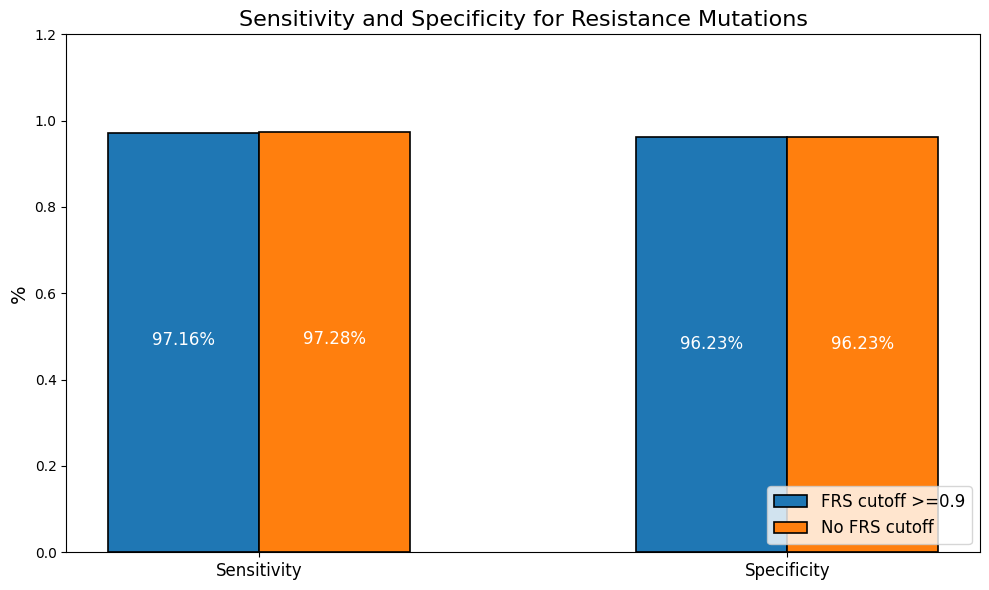

In [24]:
stats = create_stats_df(sen_all, sen_CM_all, spe_all, spe_CM_all)
plot_stats_histogram(stats, significant = False, save_figure=True, save_name = 'sensitivity_specificity_histogram_CM_minor')

In [25]:
#perform a z test to test for significant difference between the sensitivities and specificities
from statsmodels.stats.proportion import proportions_ztest

# Sensitivity
count = np.array([mutations_agg[(mutations_agg['PHENOTYPE'] == True) & (mutations_agg['RESISTANT_MUTATION'] == True)].shape[0], CM_mutations_minor[(CM_mutations_minor['PHENOTYPE'] == True) & (CM_mutations_minor['RESISTANT_MUTATION'] == True)].shape[0]])
nobs = np.array([mutations_agg[mutations_agg['PHENOTYPE'] == True].shape[0], CM_mutations_minor[CM_mutations_minor['PHENOTYPE'] == True].shape[0]])
z, p = proportions_ztest(count, nobs)
print(count, nobs, z, p)

# Specificity
count = np.array([mutations_agg[(mutations_agg['PHENOTYPE'] == False) & (mutations_agg['RESISTANT_MUTATION'] == False)].shape[0], CM_mutations_minor[(CM_mutations_minor['PHENOTYPE'] == False) & (CM_mutations_minor['RESISTANT_MUTATION'] == False)].shape[0]])
nobs = np.array([mutations_agg[mutations_agg['PHENOTYPE'] == False].shape[0], CM_mutations_minor[CM_mutations_minor['PHENOTYPE'] == False].shape[0]])
z, p = proportions_ztest(count, nobs)
print(count, nobs, z, p)

[10084 10097] [10379 10379] -0.5488793074361511 0.5830882796172004
[17007 17006] [17673 17673] 0.027921104387451576 0.9777250761371025


Check how CM presence differs in major and minor allele populations

In [48]:
# aggregate mutations_phenotype by UNIQUEID and keep columns of interest: double-check if definiion of FRS is correct
def aggregate_minor_major_allele(group):
    # Check if any row has both IS_MINOR_ALLELE == True and RESISTANT_MUTATION == True
    minor_allele_flag = any((group['IS_MINOR_ALLELE'] == True) & (group['RESISTANT_MUTATION'] == True))
    major_allele_flag = any((group['IS_MINOR_ALLELE'] == False) & (group['RESISTANT_MUTATION'] == True))

    # Get the rows where there is a resistant minor allele
    resistant_minor_allele_rows = group[(group['IS_MINOR_ALLELE'] == True) & (group['RESISTANT_MUTATION'] == True)]
    
    if not resistant_minor_allele_rows.empty:
        # If there are resistant minor alleles, get the maximum FRS value for those rows
        frs_value = resistant_minor_allele_rows['FRS'].max()
    else:
        # Otherwise, use the maximum FRS value from the entire group
        frs_value = group['FRS'].max()
    
    return pd.Series({
        'RESISTANT_MUTATION': group['RESISTANT_MUTATION'].max(),
        'COMPENSATORY_MUTATION': group['COMPENSATORY_MUTATION'].max(),
        'R_MINOR_ALLELE': minor_allele_flag,
        'R_MAJOR_ALLELE': major_allele_flag,
        'FRS': frs_value,  # Use the maximum FRS for resistant minor alleles, if present
    })

# Apply the custom aggregation function
mutations_agg = mutations.groupby('UNIQUEID').apply(aggregate_minor_major_allele).reset_index()

/var/folders/_3/8y_dwngx2614_y_52fzh1c4w0000gn/T/ipykernel_41315/2026146715.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mutations_agg = mutations.groupby('UNIQUEID').apply(aggregate_minor_major_allele).reset_index()


In [52]:
mutations_agg

,UNIQUEID,RESISTANT_MUTATION,COMPENSATORY_MUTATION,R_MINOR_ALLELE,R_MAJOR_ALLELE,FRS
0,site.00.subj.1000347.lab.H111540004.iso.1,True,False,False,True,NaN
1,site.00.subj.1000595.lab.H123460044.iso.1,True,True,False,True,NaN
2,site.00.subj.1004213.lab.H111060034.iso.1,True,True,False,True,NaN
3,site.00.subj.1004213.lab.H112000008.iso.1,True,True,False,True,NaN
4,site.00.subj.1004213.lab.H113100007.iso.1,True,True,False,True,NaN
...,...,...,...,...,...,...
38782,site.35.subj.95.lab.IE19.iso.1,True,True,False,True,NaN
38783,site.35.subj.96.lab.IE20.iso.1,True,False,False,True,NaN
38784,site.35.subj.97.lab.IE21.iso.1,True,False,False,True,NaN
38785,site.35.subj.98.lab.IE22.iso.1,True,False,False,True,NaN


In [53]:
#check overlap
overlap = mutations_agg[(mutations_agg['R_MAJOR_ALLELE'] == True) & (mutations_agg['R_MINOR_ALLELE'] == True)].UNIQUEID.to_list()
len(overlap)

30

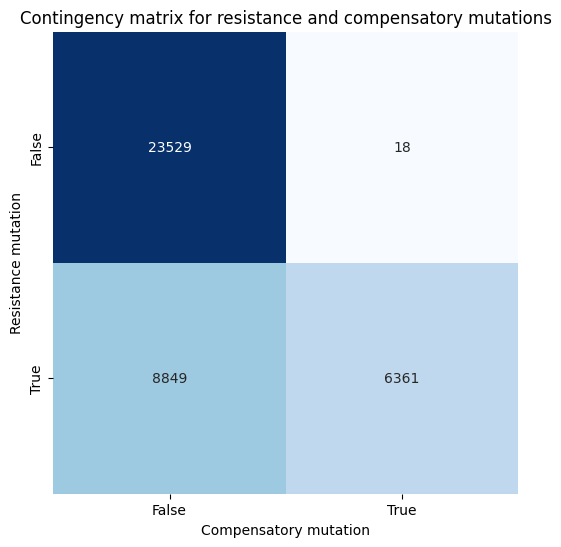

In [62]:
#make contingency matrix for samples based on resistance and compensatory mutations, exluding the overlap
def contingency_heatmap(df, overlap, save_name='contingency_heatmap.png'):
    contingency = pd.crosstab(df[~df['UNIQUEID'].isin(overlap)]['RESISTANT_MUTATION'], df[~df['UNIQUEID'].isin(overlap)]['COMPENSATORY_MUTATION'])
    contingency

    #show contingency matrix as heatmap in green colour, wihtout rounded values
    plt.figure(figsize=(6, 6))
    sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Contingency matrix for resistance and compensatory mutations')
    plt.xlabel('Compensatory mutation')
    plt.ylabel('Resistance mutation')

    #save figure in high resolution
    plt.savefig(f'figures/{save_name}', dpi=300)

    plt.show()

contingency_heatmap(mutations_agg, overlap, save_name='contingency_heatmap.png')

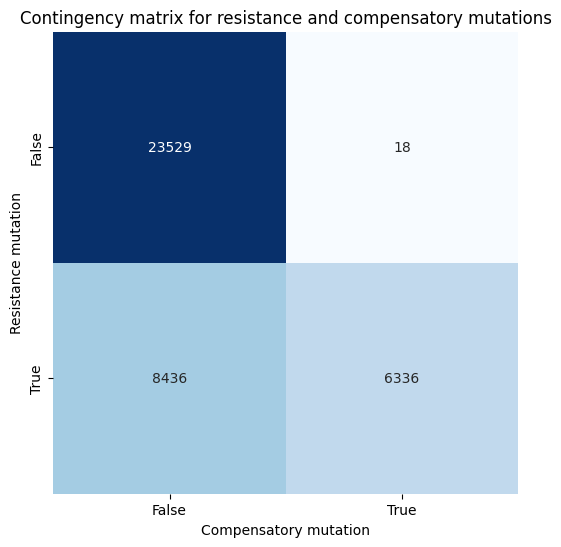

In [63]:
#exclude all samples with a minor allele from the analysis
mutations_agg_major = mutations_agg[~mutations_agg['R_MINOR_ALLELE']]
contingency_heatmap(mutations_agg_major, overlap, save_name='contingency_heatmap_major.png')


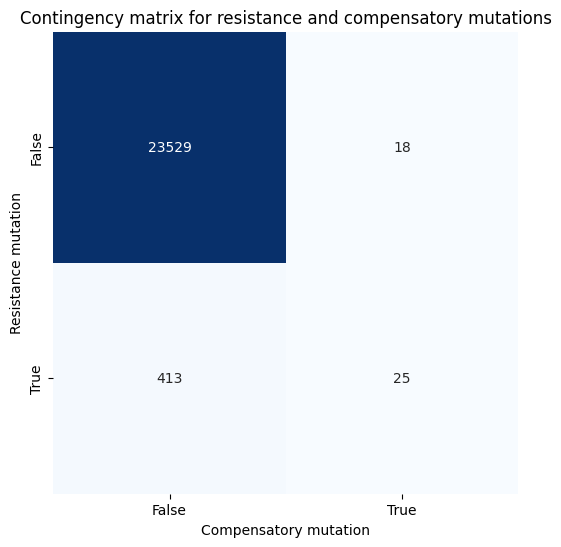

In [64]:
#exclude all samples with a resistant major allele from the analysis
mutations_agg_minor = mutations_agg[~mutations_agg['R_MAJOR_ALLELE']]
contingency_heatmap(mutations_agg_minor, overlap, save_name='contingency_heatmap_minor.png')